In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

模型假设(hypothesis)

${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$

损失函数(cost function)

$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$

In [2]:
def computeCost(X, y, theta):
    """
    损失函数
    :param X:(np.matrix) 样本特征矩阵
    :param y:(np.matrix) 目标变量一维矩阵
    :param theta: (np.matrix)模型参数一维矩阵
    :return: 损失值
    """
    inner = np.power(((X * theta.T) - y), 2)  # 计算该模型下每个样本与实际值的误差
    return np.sum(inner) / (2 * len(X))  # 计算计算顺势函数

梯度下降

$\frac{\partial}{\partial\theta_i}J(\theta_0, \theta_1)= \frac{1}{m}\sum\limits_{i=0}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$

${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta_0, \theta_1  \right)$           (for j=0 and j=1)


In [3]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))  # 存储每次迭代的theta
    parameters = int(theta.ravel().shape[1])  # theta的长度,用于计算theta的偏分
    cost = np.zeros(iters)  # 存储每次迭代的损失函数
    theta_list =[] # 存储每次迭代的theta

    for i in range(iters):  # 循环计算每一次迭代
        error = (X * theta.T) - y  # (h_θ(X)-y)

        for j in range(parameters): # 循环计算每一个theta
            term = np.multiply(error, X[:, j])  # error*X_j
            slope = (1 / len(X)) * np.sum(term)  # 1/m * \sum(term) 加和求平均
            gradient=alpha * slope  # α*slope  学习速率乘以斜率
            temp[0, j] = theta[0, j] - gradient  # 每次更新

        theta = temp  # 更新theta
        cost[i] = computeCost(X, y, theta)  #计算本次迭代的损失函数
        theta_list.extend(theta.tolist())

    return theta_list, cost


没有b

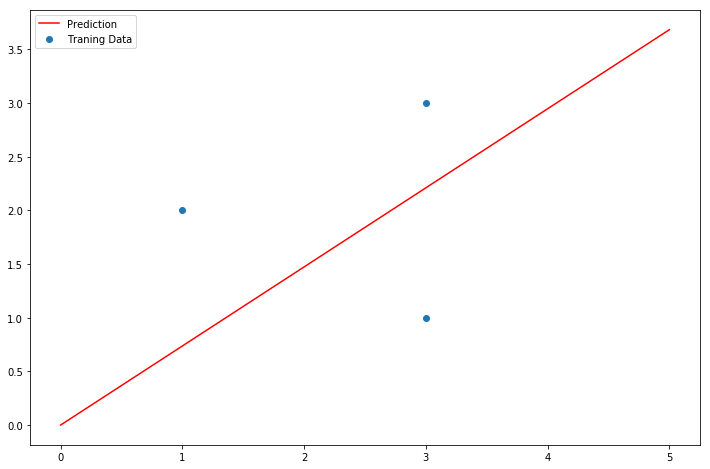

In [4]:
X=np.mat([[1],[3],[3]])
y=np.mat([[2],[1],[3]])
theta=np.mat([0])  # 初始化theta
alpha = 0.01
iters = 1000

g, cost = gradientDescent(X, y, theta, alpha, iters)

x = np.linspace(0,5,10)
f = (g[-1][0] * x)  # 预测值

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter([1,3,3], [2,1,3], label='Traning Data')
ax.legend(loc=2)
plt.show()

In [ ]:
有b

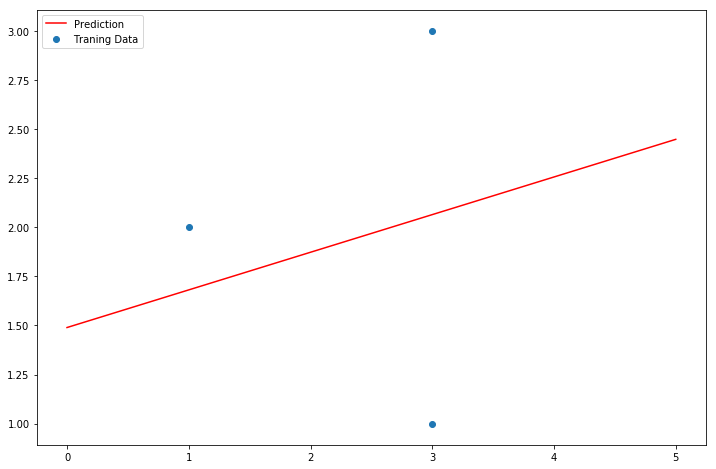

In [5]:
X=np.mat([[1,1],[1,3],[1,3]])
y=np.mat([[2],[1],[3]])
theta=np.mat([0,0])  # 初始化theta
alpha = 0.01
iters = 1000

g, cost = gradientDescent(X, y, theta, alpha, iters)

x = np.linspace(0,5,10)
f = g[-1][0] + (g[-1][1] * x)  # 预测值

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter([1,3,3], [2,1,3], label='Traning Data')
ax.legend(loc=2)
plt.show()